In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

In [2]:
from utils.southpark import get_conversations
conversations = get_conversations("/srv/hd7/jheuristic/cartman/sp.json")
    
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conversations,verbose=True)


100%|██████████| 7285/7285 [00:03<00:00, 2116.99it/s]

23281 out of 23281 tokens, coverage=1.00000)


In [3]:
preproc.ix_to_phrase(preproc.phrase_to_ix("hello, mr freeman.",10))

u'hello , mr freeman .'

(array([ 37195.,  22930.,   7522.,   2504.,   1032.,    401.,    178.,
            82.,     39.,     40.]),
 array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
          90.,  100.]),
 <a list of 10 Patch objects>)

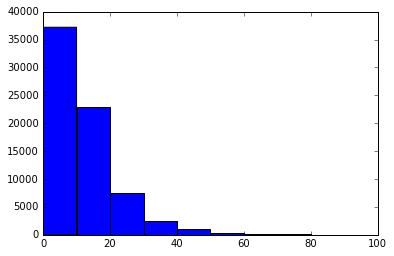

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from operator import add
phrases = reduce(add,conversations)
phrase_tokens = [preproc.tokenizer.tokenize(preproc.preprocess_phrase(line)) for sp,line in phrases]
plt.hist(map(len,phrase_tokens),
         range=(0,100)
        )

In [25]:
convs_ix = list(preproc.preprocess_conversations(conversations,verbose=True,max_len=10))

100%|██████████| 7285/7285 [00:04<00:00, 1783.49it/s]


In [28]:
from utils.generate import get_samples_with_context,get_phrase_pairs,iterate_minibatches
pairs = get_phrase_pairs(convs_ix,speaker_filter=lambda sp1,sp2:'cartman' in sp2)
triples = get_samples_with_context(convs_ix,speaker_filter=lambda sp1,sp2:'cartman' in sp2,padder=preproc.token_to_ix["PAD"])

In [48]:
for i,(cb,xb,yb) in enumerate(iterate_minibatches(triples.T,100,shuffle=True)):
    if i>5:break
    
    for line in cb[0]:
        print '>',preproc.ix_to_phrase(line)
    print preproc.ix_to_phrase(xb[0])
    print preproc.ix_to_phrase(yb[0])
    print


> welcome ! welcome everyone ! please enjoy ! the
> cartman , what the hell is all this ?
> our platinum album ceremony . i spared no expense
but you spent all the money we made !
we're faith plus one , token , there'll be

> and
> hey terrance ! looks like this might be a
> it sure does phillip . no one will oppress
aaaaah !
did you guys see that ? that was sweet

> come around here , ben !
> mom ! dad !
> son !
oh , son !
what's goin' on ?

> well let's just suck it up , guys .
> alright mccormick , let's start with you . climb
> heheh ! look at kenny . he's so poor
alright , let's go broflovski .
heheheheheh ! look you guys , a jew on

> freeze myself . if i freeze myself , then
> no .
> it's simple science , kyle .
you'll die , retard !
i'll die waiting for the wii to come out

> well , why do i have to dress up
> 'cause old ladies are fat and you are ,
> ee -
come on , cartman , the way we're filming
they better not !



(3, 10)